Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split


Import Dataset

In [ ]:
df=pd.read_csv('Crop_recommendation.csv')

Displaying Dataset

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Checking dataset for NULL Values

In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Checking Dataset for NULL values

In [ ]:
df.duplicated().sum()

0

Checking instances for each label

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Correlation Matrix

In [ ]:
corr=df.drop(['label'],axis=1).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Heatmap

<Axes: >

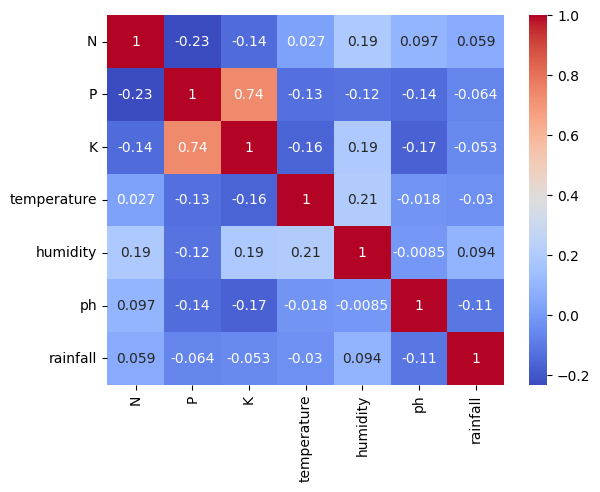

In [ ]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

Data Visualization with displot

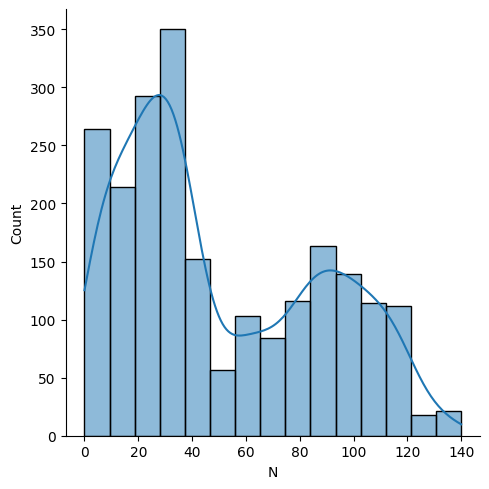

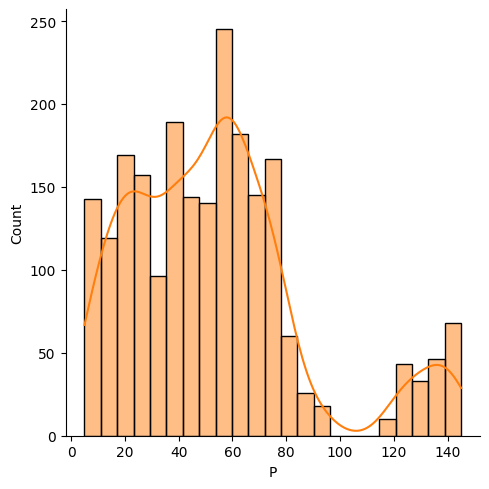

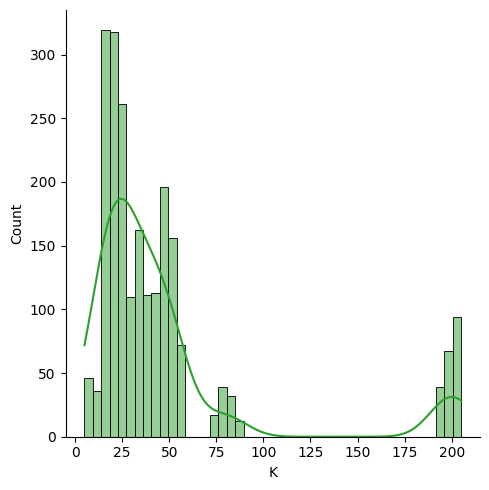

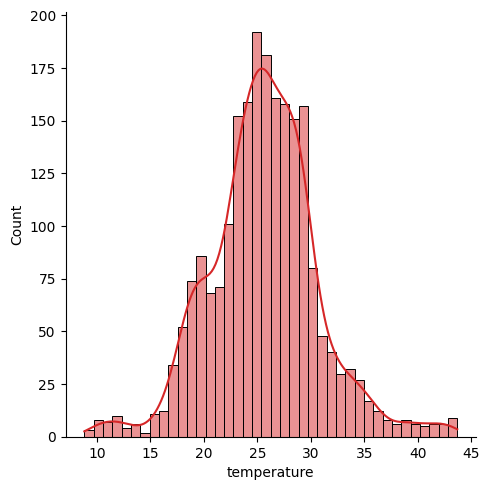

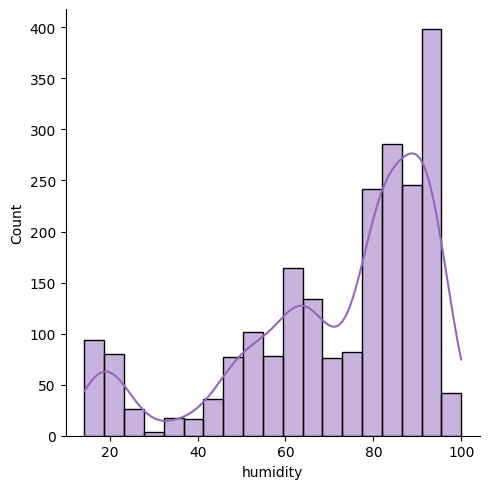

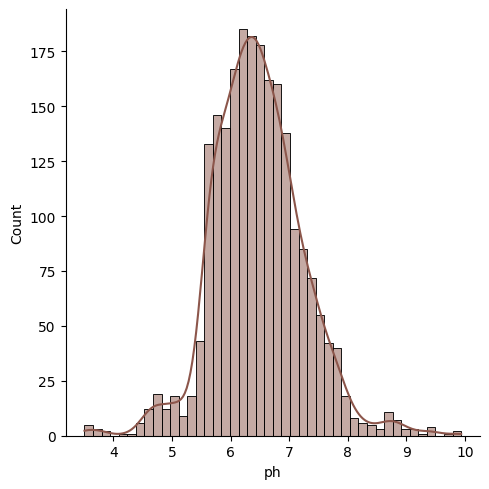

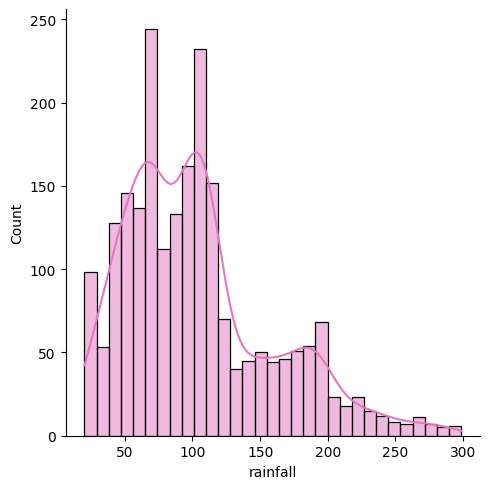

In [ ]:
i=0
for col in df.drop(['label'],axis=1).columns:
  sns.displot(data=df,x=col,kde=True, color=sns.color_palette()[i])
  i=i+1

In [ ]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
reversed_dict = dict(zip(crop_dict.values(), crop_dict.keys()))

#updating dataframe column/row.map(dictionary_name)
df['crop_num']=df['label'].map(crop_dict)
reversed_dict
df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


Shuffling dataset

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,muskmelon,9
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,watermelon,10
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya,6
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,papaya,6
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,apple,8
...,...,...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,orange,7
1095,108,94,47,27.359116,84.546250,6.387431,90.812505,banana,13
1130,11,36,31,27.920633,51.779659,6.475449,100.258567,mango,12
1294,11,124,204,13.429886,80.066340,6.361141,71.400430,grapes,11


Splitting data into Input and Output

In [ ]:
x = df.drop(['crop_num','label'],axis=1)
y = df['crop_num']

Importing ML classifier Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

Designing a dictionary of Model names mapped to the corresponding model classes

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

In [ ]:
def model_score(model,X_train,X_test,Y_train,Y_test):
  model.fit(X_train,Y_train);
  return model.score(X_test,Y_test)

Creating a dictionary of model names mapped to their accuracy scores(initialised as 0)

In [ ]:
models_accuracy = {
    'Logistic Regression': 0,
    'Support Vector Machine': 0,
    'K-Nearest Neighbors': 0,
    'Decision Tree': 0,
    'Random Forest': 0,
}

Performing K fold cross validation for all models

In [ ]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=3, shuffle=True, random_state=42)  # Adding shuffle for randomness
for name, md in models.items():
    scores = []
    for train_index, test_index in folds.split(x, y):
        X_train, X_test, Y_train, Y_test = x.iloc[train_index], x.iloc[test_index], \
                                           y.iloc[train_index], y.iloc[test_index]
        md.fit(X_train, Y_train)

        y_pred = md.predict(X_test)
        scores.append(accuracy_score(Y_test, y_pred) * 100)
    avg=np.mean(scores)
    models_accuracy[name]=avg;
    print(f"{name} with accuracy: {scores}\nAverage accuracy score: {avg}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression with accuracy: [95.64032697547684, 95.08867667121419, 96.72578444747613]
Average accuracy score: 95.81826269805572

Support Vector Machine with accuracy: [97.82016348773843, 97.68076398362892, 97.27148703956344]
Average accuracy score: 97.59080483697693

K-Nearest Neighbors with accuracy: [97.68392370572208, 98.09004092769442, 98.63574351978171]
Average accuracy score: 98.13656938439941

Decision Tree with accuracy: [98.50136239782016, 99.45429740791269, 97.81718963165075]
Average accuracy score: 98.5909498124612

Random Forest with accuracy: [99.31880108991825, 99.86357435197817, 99.45429740791269]
Average accuracy score: 99.54555761660303



Plotting the Learning curve

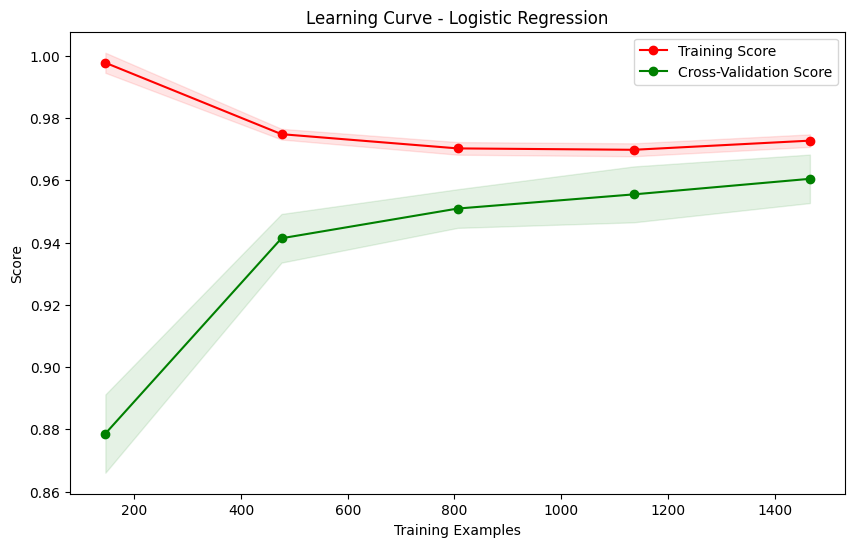

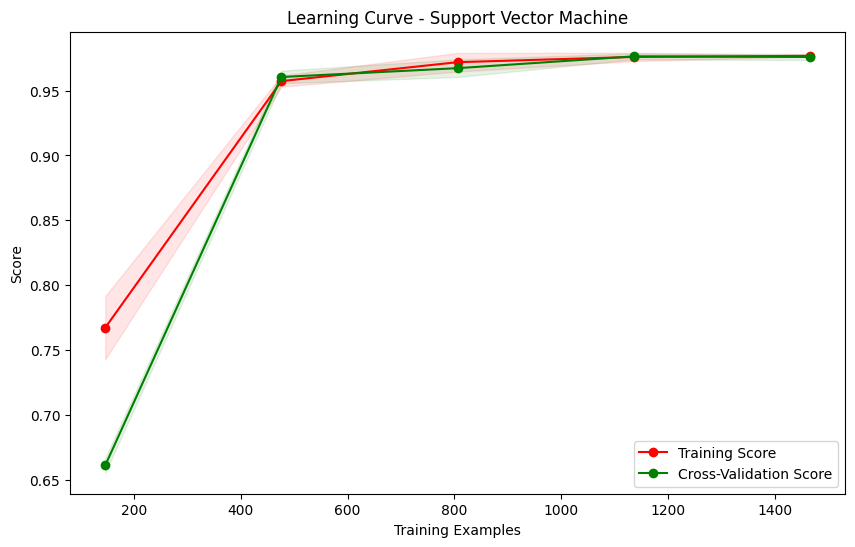

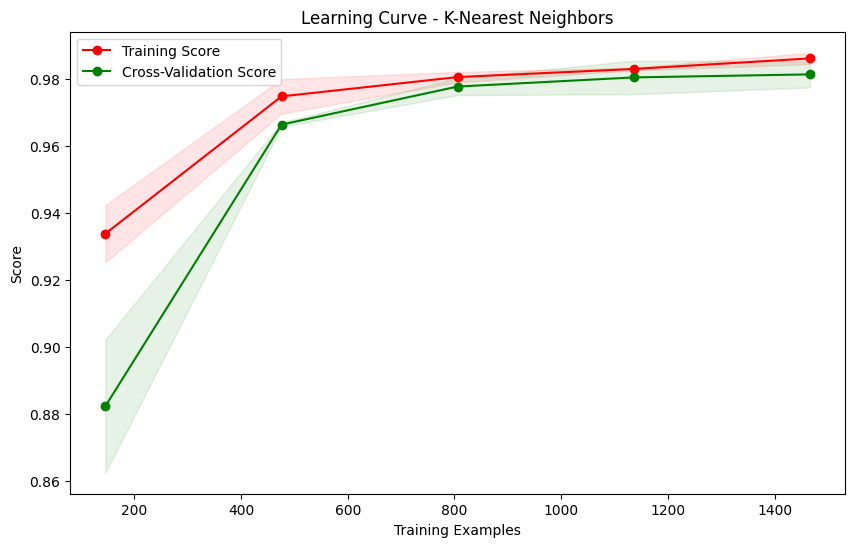

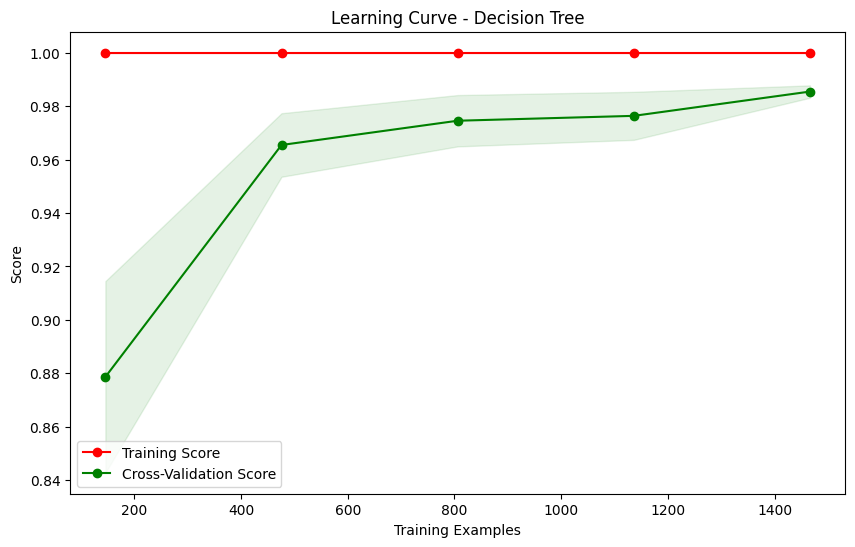

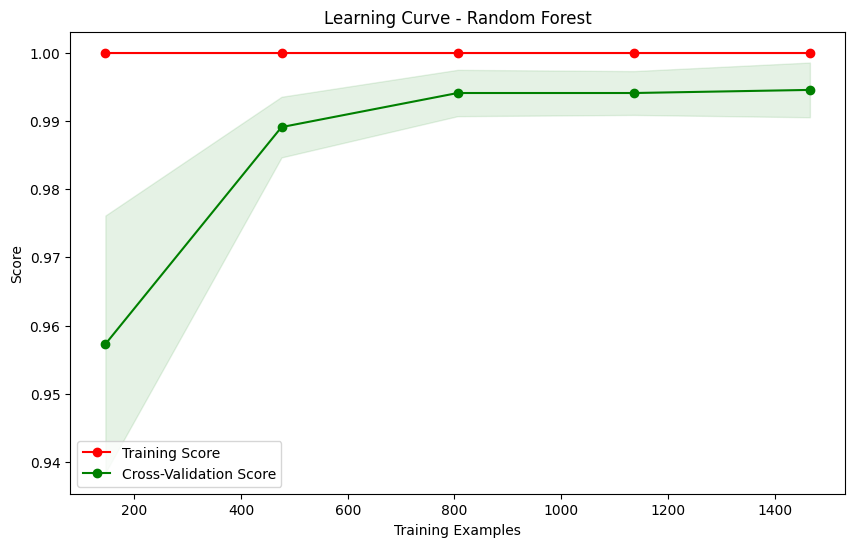

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming 'import numpy as np' is present in your code

for name, md in models.items():
    train_sizes, train_scores, test_scores = learning_curve(md, x, y, cv=folds, scoring='accuracy', n_jobs=-1)

    # Calculate mean and standard deviation of training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting learning curves
    plt.figure(figsize=(10, 6))
    plt.title(f'Learning Curve - {name}')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")

    plt.legend(loc="best")
    plt.show()


Finding the best Model

In [ ]:
best_model=list(models_accuracy.keys())[list(models_accuracy.values()).index(max(models_accuracy.values()))]
best_model

'Random Forest'

Prediction

In [ ]:
input=[[51,53,28,26,51,8,140]]
m=models[best_model]
reversed_dict[m.predict(input)[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'pigeonpeas'

In [ ]:
m.predict_proba(input)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.  , 0.01, 0.02, 0.  , 0.02, 0.06, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.15, 0.  , 0.  , 0.  , 0.06, 0.  , 0.11, 0.32, 0.  , 0.07, 0.17])

Predicting atmost top 3 crops in decreasing order:
P1 >= .5 P0
P2 >= .75 P1
and P >= .1

In [ ]:
sprob=np.array([np.argsort(m.predict_proba(input)[0]),np.sort(m.predict_proba(input)[0])])
print(sprob)
new_dict = {a:b for a,b in zip(np.argsort(m.predict_proba(input)[0]),np.sort(m.predict_proba(input)[0]))}
new_dict
print(new_dict)

[[0.0e+00 1.9e+01 1.6e+01 1.4e+01 1.3e+01 1.2e+01 9.0e+00 8.0e+00 1.0e+01
  3.0e+00 7.0e+00 6.0e+00 1.0e+00 4.0e+00 2.0e+00 5.0e+00 1.5e+01 2.0e+01
  1.7e+01 1.1e+01 2.1e+01 1.8e+01]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 1.0e-02 1.0e-02 2.0e-02 2.0e-02 6.0e-02 6.0e-02 7.0e-02
  1.1e-01 1.5e-01 1.7e-01 3.2e-01]]
{0: 0.0, 19: 0.0, 16: 0.0, 14: 0.0, 13: 0.0, 12: 0.0, 9: 0.0, 8: 0.0, 10: 0.0, 3: 0.0, 7: 0.0, 6: 0.01, 1: 0.01, 4: 0.02, 2: 0.02, 5: 0.06, 15: 0.06, 20: 0.07, 17: 0.11, 11: 0.15, 21: 0.17, 18: 0.32}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
data1=sprob[:,-1]
data2=sprob[:,-2]
data3=sprob[:,-3]
if data1[1]>0.1:
  print(f"Crop {reversed_dict[data1[0]]} with probability of {data1[1]*100:.2f}%")
  if data2[1]>=(.5*data1[1]) and data2[1]>0.1:
    print(f"Crop {reversed_dict[data2[0]]} with probability of {data2[1]*100:.2f}%")
    if data3[1]>=(.75*data2[1]) and data3[1]>0.1:
      print(f"Crop {reversed_dict[data3[0]]} with probability of {data3[1]*100:.2f}%")
else:
  print("Sorry Infertile condition for agriculture")

Crop mothbeans with probability of 32.00%
Crop chickpea with probability of 17.00%
Crop grapes with probability of 15.00%
